In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn import svm
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix

In [2]:
data=pd.read_csv('./Data/clean_data.csv')
data.drop(data.columns[[0]],axis=1,inplace=True)

In [3]:
def Range(a):
    return a.max()-a.min();

In [4]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap='YlOrRd'):
    plt.rcParams.update({'font.size': 18})
    plt.figure(figsize=(20,10),)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout();

In [5]:
range_sample=data.groupby(['Activity','Subject','Sample_Num']).apply(Range).add_prefix('range_')
stdev_sample=data.groupby(['Activity','Subject','Sample_Num']).std().add_prefix('std_')
mean_sample=data.groupby(['Activity','Subject','Sample_Num']).mean().add_prefix('mean_')

In [6]:
total_data=pd.concat([stdev_sample,mean_sample,range_sample],axis=1)
total_data.reset_index(inplace=True)
total_data['Class']=total_data.Activity.replace({'sitting':'Light','standing':'Light','lying':'Light','walking':'Moderate','climbingup':'Moderate','climbingdown':'Moderate','jumping':'Vigorous','running':'Vigorous'})

In [7]:
columns=[
       'std_attr_x_gyro', 'std_attr_y_gyro', 'std_attr_z_gyro',
         'std_attr_x_acc', 'std_attr_y_acc', 'std_attr_z_acc', 
         'mean_attr_x_gyro', 'mean_attr_y_gyro', 'mean_attr_z_gyro', 
         'mean_attr_x_acc', 'mean_attr_y_acc', 'mean_attr_z_acc']

In [8]:
temp=total_data.Subject<=4
X=total_data[columns][temp]

In [9]:
# Plotting correlation coefficients

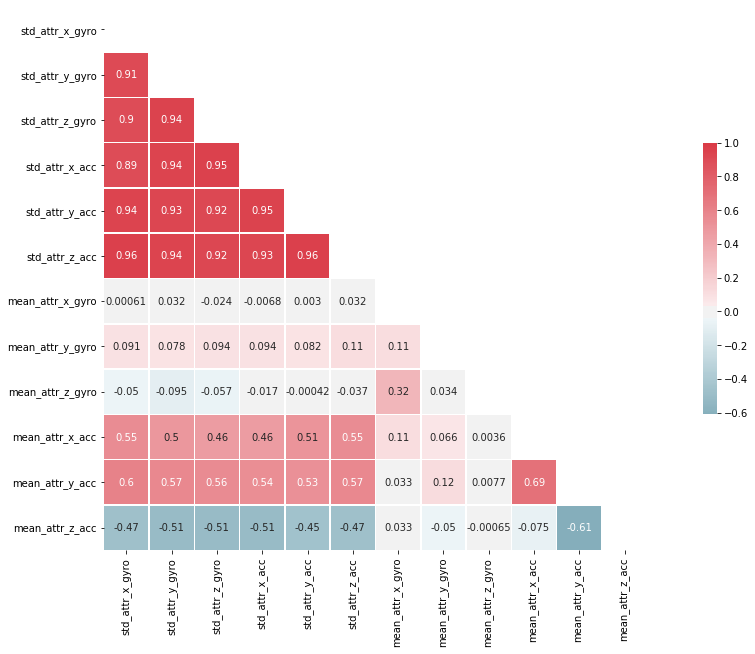

In [10]:
correlation=X.corr()
hide=np.zeros_like(correlation,dtype=np.bool)
hide[np.triu_indices_from(hide)]=True
f,ax=plt.subplots(figsize=(20,10))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(correlation,mask=hide,cmap=cmap,center=0,annot=True,square=True,linewidth=0.5,cbar_kws={"shrink":0.5});

In [11]:
# Implementing SVM model on just accelerometer data

In [12]:
columns=[
         'std_attr_x_acc', 'std_attr_y_acc', 'std_attr_z_acc', 
         'mean_attr_x_acc', 'mean_attr_y_acc', 'mean_attr_z_acc', 
         'range_attr_x_acc', 'range_attr_y_acc', 'range_attr_z_acc']

In [13]:
# Training model on just accelerometer data

In [14]:
mask=total_data.Subject<=4
X_final=total_data[columns][mask]
Y_final=total_data.Class[mask]
classifier=svm.SVC(kernel='poly',gamma='scale',C=1.0)
classifier.fit(X_final,Y_final)
Y_predicted=classifier.predict(X_final)
print(f'Training F1 score is: {f1_score(Y_final,Y_predicted,average="macro"):.3f}')
print(f'Training accuracy is: {accuracy_score(Y_final,Y_predicted):.3f}')

Training F1 score is: 0.977
Training accuracy is: 0.983


In [15]:
# Testing SVM model on last two unseen subjects

In [16]:
temp=total_data.Subject>=5
X_final=total_data[columns][temp]
Y_final=total_data.Class[temp]

Testing F1 score is: 0.938
Testing accuracy is: 0.960
              precision    recall  f1-score   support

       Light       1.00      1.00      1.00      1905
    Moderate       0.91      1.00      0.95      1608
    Vigorous       1.00      0.76      0.86       699

    accuracy                           0.96      4212
   macro avg       0.97      0.92      0.94      4212
weighted avg       0.96      0.96      0.96      4212



<Figure size 432x288 with 0 Axes>

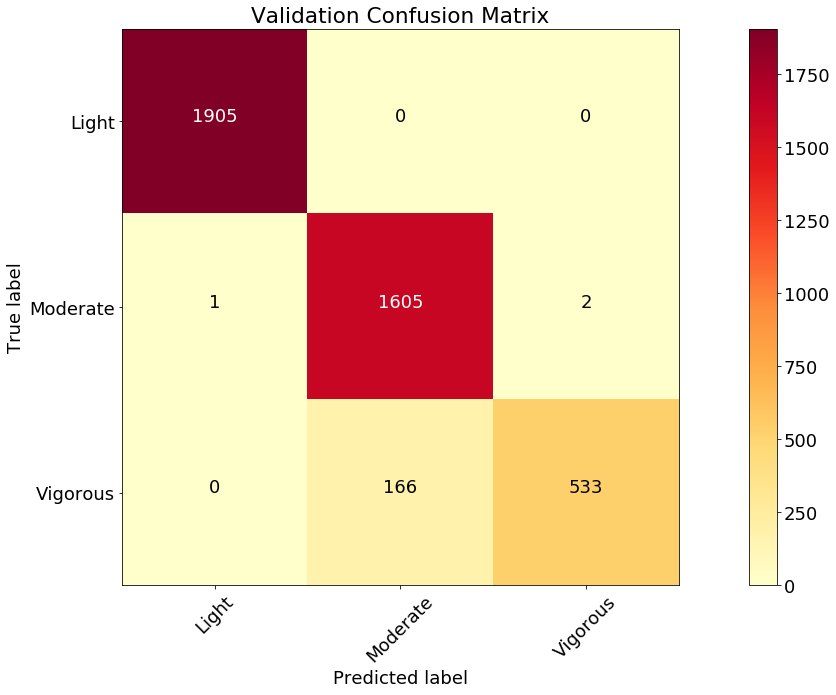

In [17]:
Y_predicted=classifier.predict(X_final)
print(f'Testing F1 score is: {f1_score(Y_final,Y_predicted,average="macro"):.3f}')
print(f'Testing accuracy is: {accuracy_score(Y_final,Y_predicted):.3f}')
print(classification_report(Y_final,Y_predicted))
np.set_printoptions(precision=2)
cm=confusion_matrix(Y_final,Y_predicted)
plt.figure()
plot_confusion_matrix(cm,classes=['Light','Moderate','Vigorous'],title='Validation Confusion Matrix');